In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [40]:
class Point():
    def __init__(self, x_cordinate, y_cordinate):
        self.x = float(x_cordinate)
        self.y = float(y_cordinate)

    def __repr__(self):
        return f"Point : x = {self.x}, y = {self.y}"

    def _plot(self):
        # Create the plot
        fig, ax = plt.subplots()
        
        # Set equal aspect ratio
        ax.set_aspect('equal')
        ax.plot(self.x, self.y, 'o')

class Line():
    def __init__(self, slope, y_intercept):
        self.a = float(slope)
        self.b = float(y_intercept)

    def __repr__(self):
        return f"Line : y = {self.a}x + {self.b}"

    def _plot(self):
        X = [i for i in range(-10,10)]
        Y = [self.a * x + self.b for x in X]
        plt.plot(X, Y)

def distance(A, B):
    if isinstance(A,Point) and isinstance(B,Point):
        return math.sqrt((A.x - B.x)**2 + (A.y - B.y)**2)
    if (isinstance(A, Line) and isinstance (B, Point)) or (isinstance(A, Line) and isinstance (B, Point)):
        line = A
        point = B
        if isinstance(A, Point):
            point = A
            line = B
        if line.a == 0:
            return abs(point.y - line.b)
        closest_point = Point(0,0)
        closest_point.x = (point.y + (point.x / line.a) - line.b) * (line.a / (line.a**2 + 1))
        closest_point.y = line.a * closest_point.x + line.b
        return distance(point, closest_point)
    if isinstance(A, Line) and isinstance(B, Line):
        if A.a != B.a:
            return 0
        else:
            return distance(Point(0,A.b), B)

def intersection(A,B):
    if isinstance(A, Line) and isinstance(B, Line):
        if A.a == B.a:
            if A.b == B.b:
                return A
            else:
                return None
        else:
            x_point = (B.b - A.b)/ (A.a - B.a)
            return Point(x_point, A.a * x_point + A.b) 
    elif isinstance (A,Line) and isinstance(B,Point):
        if belongs(A,B):
            return B
        else:
            return None
    elif isinstance (B,Line) and isinstance(A,Point):
        return intersection(B,A)
    elif isinstance(A, Point) and isinstance(B,Point):
        if A.x == B.x and A.y == B.y:
            return A
        else:
            return None

def belongs(A,B):
    if isinstance(A, Point) and isinstance(B,Line):
        return A.y == B.a * A.x + B.b
    elif isinstance(B, Point) and isinstance(A,Line):
        return belongs(B,A)

def multiPlot(*things, x_lim = 10, y_lim = 10):
        # Create the plot
        fig, ax = plt.subplots()
        
        # Set equal aspect ratio
        ax.set_aspect('equal')
        
        # Set limits (adjust these as needed)
        ax.set_xlim(- x_lim, x_lim)
        ax.set_ylim(- y_lim, y_lim)
        
        # Set ticks (adjust step size as needed)
        ax.set_xticks(np.arange(- x_lim, x_lim, 1))
        ax.set_yticks(np.arange(- y_lim, y_lim, 1))
        
        for thing in things:
            if isinstance(thing, Point):
                ax.plot(thing.x, thing.y, 'o')
            
            if isinstance(thing, Line):
                X = [i for i in range(- x_lim, x_lim, 1)]
                Y = [thing.a * x + thing.b for x in X ]
                ax.plot(X, Y)   

        
        # Add thin lines for x=0 and y=0
        ax.axvline(x=0, color='k', linewidth=0.5)
        ax.axhline(y=0, color='k', linewidth=0.5)
    
        # Add grid for better visibility
        ax.grid(True)
        
        # Show the plot
        plt.show()
        

0.4931969619160718
2.5298221281347035
Line : y = 6.0x + -1.0


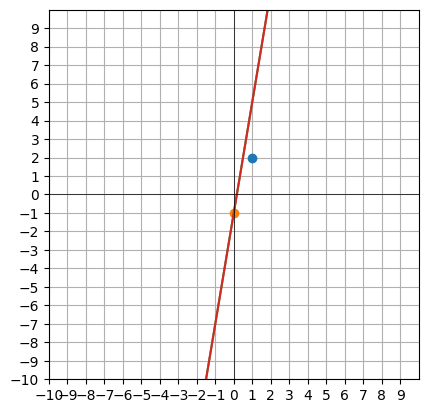

In [41]:
p1 = Point(1,2)
p2 = Point(0,-1)
l1 = Line(6,-1)
l2 = Line(6,-1)
print(distance(l2,p1))
print(math.sqrt(2.4 **2 + 0.8 **2))
print(intersection(l1, l2))
multiPlot(p1, p2, l1, l2)


In [25]:
l1 = Line(5,-1)
l2 = Line(-1/5,-8)
print(intersection(l1, l2))

Point : x = -1.346153846153846, y = -7.73076923076923


In [39]:
a = 2
b= 1
X = [i for i in range(-10,10,1)]
Y = [a * x + b for x in X]
X

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]